In [2]:
pip install pydub


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [3]:
import numpy as np

import json
import pandas as pd
from tqdm import tqdm
import os

import IPython.display
import sklearn.preprocessing  
from sklearn.model_selection import train_test_split 
import librosa
import pydub
import pickle as pickle
import librosa.display
import sklearn.preprocessing 
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dense, Dropout,Flatten, Conv2D, Conv1D, MaxPooling2D,LSTM, TimeDistributed, Convolution1D, MaxPooling1D, BatchNormalization, GlobalAveragePooling2D
from tensorflow.keras.callbacks import TensorBoard
from tensorflow.keras.losses import BinaryCrossentropy
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import f1_score
from tensorflow.keras.callbacks import Callback

import tensorflow as tf
from tensorflow.keras import backend as K
import keras



In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
wav_path = "/content/drive/My Drive/accentdata"
wav_filenames = os.listdir(wav_path)
ex_wav_filenames = wav_filenames[0]
ex_wav_filenames
eg_wave, eg_sr = librosa.load(wav_path + "/" +ex_wav_filenames, mono=True )

In [6]:
file_name_mfcc = []
for filename in tqdm(wav_filenames):
  wave, sr = librosa.load(wav_path+ "/" +filename, mono = True)
  mfcc = librosa.feature.mfcc(y=wave, sr = sr)
  file_name_mfcc.append([filename, wave, mfcc, sr])



100%|██████████| 662/662 [02:35<00:00,  4.26it/s]


In [7]:
data = pd.DataFrame(data = file_name_mfcc, columns = ["filename", "wav", "mfcc", "sr"])

In [8]:
data = data[["filename", "mfcc", "sr"]]

In [9]:
data = data.sort_values(by= "filename")

In [10]:
data

,filename,mfcc,sr
351,hausa1.wav,"[[-146.01768, -153.39105, -210.3232, -242.0239...",22050
121,hausa10.wav,"[[-266.99124, -216.7935, -154.13612, -125.3139...",22050
545,hausa11.wav,"[[-403.10678, -398.43338, -292.63303, -202.575...",22050
486,hausa12.wav,"[[-427.7325, -421.71292, -389.26068, -342.0095...",22050
612,hausa13.wav,"[[-142.56625, -116.10384, -96.849174, -91.2646...",22050
...,...,...,...
566,yoruba95.wav,"[[-376.32935, -385.9099, -411.8818, -432.94998...",22050
452,yoruba96.wav,"[[-189.76833, -158.44206, -149.4194, -149.6400...",22050
97,yoruba97.wav,"[[-261.9663, -255.17252, -238.89098, -165.0040...",22050
4,yoruba98.wav,"[[-245.23903, -261.71207, -282.54337, -273.279...",22050


NameError: ignored

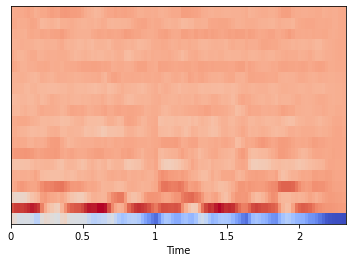

In [11]:
librosa.display.specshow(data["mfcc"][0], x_axis = "time")
plt.colorbar()
plt.tight.layout()
plt.title("mfcc")
plt.show

NameError: ignored

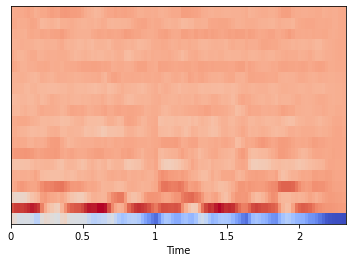

In [12]:
librosa.display.specshow(data["mfcc"][0], x_axis = "time")
plt.colorbar()
plt.tight.layout()
plt.title("mfcc")
plt.show


NameError: ignored

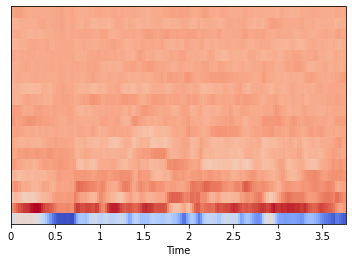

In [13]:
librosa.display.specshow(data["mfcc"][400], x_axis = "time")
plt.colorbar()
plt.tight.layout()
plt.title("mfcc")
plt.show


In [14]:
data["native_language"] = data["filename"].str[:-4]

In [15]:
data["native_language"] = data.apply(lambda x: "".join([i for i in x["native_language"] if not i.isdigit()]), axis = 1)

In [16]:
data["flag"] = data['native_language'].replace(['hausa', 'igbo', 'yoruba'],
                        [0, 1, 2])

In [17]:
MFCC_MAX_LEN = 0
for arr in data["mfcc"]:
  if arr.shape[1] > MFCC_MAX_LEN:
    MFCC_MAX_LEN = arr.shape[1]
    
MFCC_MAX_LEN

402

In [18]:
MFCC_NUM = 0
for arr in data["mfcc"]:
  if arr.shape[0] > MFCC_NUM:
      MFCC_NUM = arr.shape[0]
    
MFCC_NUM

20

In [19]:
def resize_mfcc(df,MFCC_MAX_LEN):
    df["padded_mfcc"] = df.apply(lambda x: librosa.util.fix_length(data = x["mfcc"],size = MFCC_MAX_LEN,axis = 1), axis = 1)
    return df
df = resize_mfcc(data,MFCC_MAX_LEN)

In [20]:
train_data, test_data = train_test_split(data, test_size = 0.2, random_state=123)


In [21]:
train_data.shape

(529, 6)

In [22]:
x_train = np.array(list(train_data["padded_mfcc"]))

x_test = np.array(list(test_data["padded_mfcc"]))

In [23]:
y_train = tf.one_hot(y_train, depth=3)
y_test = tf.one_hot(y_test, depth=3)

NameError: ignored

In [ ]:
# x_train = np.expand_dims(x_train, axis=2)
# x_test = np.expand_dims(x_test, axis=2)

In [ ]:
x_train.shape

(529, 20, 1, 402)

In [ ]:
y_train = train_data["flag"]
y_test= test_data["flag"]

In [ ]:
y_train = tf.one_hot(y_train, depth=3)
y_test = tf.one_hot(y_test, depth=3)


In [ ]:
y_train.shape[1]

3

In [ ]:
# feature_dim_1 = MFCC_NUM
# feature_dim_2 = MFCC_MAX_LEN
# channel = 1

In [ ]:
# x_train_reshaped = x_train.reshape(x_train.shape[0], feature_dim_1,feature_dim_2,channel)
# # x_val_reshaped = x_val.reshape(x_val.shape[0], feature_dim_1,feature_dim_2,channel)
# x_test_reshaped = x_test.reshape(x_test.shape[0], feature_dim_1,feature_dim_2,channel)


In [ ]:
x_train_reshaped.shape

(529, 20, 402, 1)

In [ ]:
MFCC_MAX_LEN

402

In [ ]:
# model = Sequential()
# model.add(Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(402,20)))
# model.add(Conv1D(filters=64, kernel_size=3, activation='relu'))
# model.add(Dropout(0.5))
# model.add(MaxPooling1D(pool_size=2))
# model.add(Flatten())
# model.add(Dense(3, activation='softmax'))
# model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
# model = Sequential()
# model.add(Conv1D(32, 2, activation="relu", input_shape=(402,20)))
# model.add(Dense(16, activation="relu"))
# model.add(MaxPooling1D())
# model.add(Flatten())
# model.add(Dense(3, activation = 'softmax'))
# model.compile(loss = 'sparse_categorical_crossentropy', 
#      optimizer = "adam",               
#               metrics = ['accuracy'])
# model.summary()

In [ ]:
model = Sequential()

model.add(Conv1D(32, 4, activation='relu', padding='same', input_shape=(402,20,1
                                                                        )))
model.add(LSTM(32, return_sequences=True))
model.add(MaxPooling1D(2))
model.add(Conv1D(16, 8, activation="relu", padding='same'))
model.add(LSTM(64, return_sequences=True))
model.add(MaxPooling1D(2))
model.add(Conv1D(16, 8, activation="relu", padding='same'))
model.add(LSTM(128))
model.add(MaxPooling1D(2))
model.add(Dense(3, activation='sigmoid'))

ValueError: ignored

In [ ]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_5 (Conv1D)           (None, 402, 32)           160       
                                                                 
 lstm_3 (LSTM)               (None, 402, 32)           8320      
                                                                 
 max_pooling1d_2 (MaxPooling  (None, 201, 32)          0         
 1D)                                                             
                                                                 
 conv1d_6 (Conv1D)           (None, 201, 16)           4112      
                                                                 
 lstm_4 (LSTM)               (None, 201, 64)           20736     
                                                                 
 max_pooling1d_3 (MaxPooling  (None, 100, 64)          0         
 1D)                                                  

In [ ]:
model.compile(loss = keras.losses.categorical_crossentropy, optimizer = tf.keras.optimizers.Adam(lr = 0.05),metrics=["Accuracy"])
history = model.fit(x_train, y_train, batch_size =10 , epochs = 50, verbose = 1 ),
validation_data = (x_test, y_test)

Epoch 1/50


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


ValueError: ignored